# Capital Bike Share Project

### Index
1. [Load & Clean Data](#load--clean-data)<br>
2. [Feature Engineering](#feature-engineering)<br>
3. [Exploratory Data Analysis](#exploratory-data-analysis)<br>

# Load & Clean Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)

In [2]:
# load daily weather data

df_weather = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv.', sep=',', header=0)
df_weather

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


In [3]:
# remove Casual column since we only need hourly weather details from here
df_weather = df_weather[['Date', 'Hour','relativehumidity_2m (%)', 'temperature_2m (°C)', 'weathercode (wmo code)', 'windspeed_10m (km/h)' ]]
df_weather

,Date,Hour,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,2021-01-01,0,90,2.4,1,10.2
1,2021-01-01,1,88,1.8,1,10.0
2,2021-01-01,2,87,1.1,2,10.1
3,2021-01-01,3,81,1.6,2,10.6
4,2021-01-01,4,77,1.6,2,9.9
...,...,...,...,...,...,...
26275,2023-12-31,19,71,-7.7,0,3.3
26276,2023-12-31,20,79,-10.2,0,6.7
26277,2023-12-31,21,80,-11.0,0,10.0
26278,2023-12-31,22,80,-10.4,0,8.7


In [4]:
df_weather.columns

Index(['Date', 'Hour', 'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')

In [5]:
# rename columns
df_weather = df_weather.rename(columns={
    'Date': 'date', 
    'Hour': 'hour', 
    'relativehumidity_2m (%)': 'humidity', 
    'temperature_2m (°C)': 'temperature',  
    'weathercode (wmo code)': 'wmo_code', 
    'windspeed_10m (km/h)': 'windspeed'
})
df_weather

,date,hour,humidity,temperature,wmo_code,windspeed
0,2021-01-01,0,90,2.4,1,10.2
1,2021-01-01,1,88,1.8,1,10.0
2,2021-01-01,2,87,1.1,2,10.1
3,2021-01-01,3,81,1.6,2,10.6
4,2021-01-01,4,77,1.6,2,9.9
...,...,...,...,...,...,...
26275,2023-12-31,19,71,-7.7,0,3.3
26276,2023-12-31,20,79,-10.2,0,6.7
26277,2023-12-31,21,80,-11.0,0,10.0
26278,2023-12-31,22,80,-10.4,0,8.7


In [6]:
df_weather.dtypes

date            object
hour             int64
humidity         int64
temperature    float64
wmo_code         int64
windspeed      float64
dtype: object

In [7]:
df_weather['date'] = pd.to_datetime(df_weather['date'])

In [8]:
df_weather.describe(include='all')

,date,hour,humidity,temperature,wmo_code,windspeed
count,26280,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000
mean,2022-07-02 00:00:00,11.500000,62.967884,14.412782,7.228311,10.171298
min,2021-01-01 00:00:00,0.000000,5.000000,-14.600000,0.000000,0.000000
25%,2021-10-01 00:00:00,5.750000,46.000000,6.100000,0.000000,6.500000
50%,2022-07-02 00:00:00,11.500000,64.000000,14.800000,1.000000,9.200000
75%,2023-04-02 00:00:00,17.250000,82.000000,22.700000,2.000000,12.900000
max,2023-12-31 00:00:00,23.000000,100.000000,41.500000,75.000000,40.100000
std,NaN,6.922318,22.724320,10.285751,17.630961,5.261033


In [9]:
# count hours for the date range in df 
365*3*24

26280

In [10]:
df_weather.isna().sum()

date           0
hour           0
humidity       0
temperature    0
wmo_code       0
windspeed      0
dtype: int64

In [11]:
df_weather.duplicated().sum()

0

In [12]:
# load data for bike rides
df_rides = pd.read_csv('CBS_2021-2023_Full.csv.', sep=',', header=0, low_memory=False).copy()
df_rides.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [13]:
df_rides.shape

(10693997, 13)

In [14]:
df_rides[df_rides['rideable_type'] == 'classic_bike']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual
9,874D92427D41BC30,classic_bike,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131.0,14th & R St NW,31202.0,38.934405,-77.032687,38.913046,-77.032008,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693990,39747241E0C7663A,classic_bike,2023-12-31 23:57:53,2024-01-01 00:13:53,18th & New Hampshire Ave NW,31324.0,17th & K St NW,31213.0,38.911268,-77.041829,38.902760,-77.038630,member
10693991,5FFF7B5DE01103EE,classic_bike,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884095,-76.995234,38.890461,-76.988355,casual
10693992,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member
10693994,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual


In [15]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


In [16]:
df_rides.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

* missing values in the station_name and station_id columns likely represent bikes that were not picked up from or dropped off at a station 
* however, the 2 rows with missing start location values, as well as the 16,765 rows with missing end location values, should be removed

In [17]:
# remove rows with missing start_lat, start_lng, end_lat, or end_lng
df_rides = df_rides.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng']).reset_index(drop=True)
df_rides.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      794519
end_station_id        794519
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
dtype: int64

In [18]:
df_rides['started_at'] = pd.to_datetime(df_rides['started_at'])

df_rides['ended_at'] = pd.to_datetime(df_rides['ended_at'])

In [19]:
# create trip_duration column 
df_rides['trip_duration'] = df_rides['ended_at'] - df_rides['started_at']
df_rides['trip_duration'] = df_rides['trip_duration'].dt.total_seconds() / 60
df_rides.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,25.333333
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual,15.850000
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,14.216667
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,5.583333
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,3.233333


In [20]:
df_rides['rideable_type'].unique()

array(['classic_bike', 'electric_bike', 'docked_bike'], dtype=object)

In [21]:
df_rides['rideable_type'].value_counts()

rideable_type
classic_bike     7698745
electric_bike    2444151
docked_bike       534336
Name: count, dtype: int64

In [22]:
df_rides['rideable_type'] = df_rides['rideable_type'].astype('category')

In [23]:
#check missing values in start station name 
df_filtered = df_rides[df_rides['start_station_name'].isna()]
df_filtered

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
5,0FD3B4B2152425C3,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,NaN,Georgia Ave & Kennedy St NW,31415.0,38.93,-77.03,38.956738,-77.027940,casual,10.816667
20,997E8E08C493F034,electric_bike,2021-01-01 00:27:18,2021-01-01 00:34:30,NaN,NaN,NaN,NaN,38.99,-77.03,38.990000,-77.030000,member,7.200000
22,87E06BFC439643DA,electric_bike,2021-01-01 00:32:44,2021-01-01 00:32:51,NaN,NaN,NaN,NaN,38.89,-76.99,38.890000,-76.990000,casual,0.116667
24,6E4F247C2E3358BA,electric_bike,2021-01-01 00:35:51,2021-01-01 00:37:57,NaN,NaN,Lincoln Park / 13th & East Capitol St NE,31619.0,38.89,-76.99,38.890484,-76.988408,casual,2.100000
37,60807578738CDEB8,electric_bike,2021-01-01 00:50:13,2021-01-01 00:57:14,NaN,NaN,NaN,NaN,38.95,-77.03,38.930000,-77.040000,casual,7.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677190,A7B09070FCF499EB,electric_bike,2023-12-31 23:43:05,2023-12-31 23:46:24,NaN,NaN,NaN,NaN,38.94,-77.03,38.940000,-77.020000,casual,3.316667
10677196,8849112D688B0459,electric_bike,2023-12-31 23:45:13,2024-01-01 00:02:39,NaN,NaN,11th & M St NW,31266.0,38.88,-77.03,38.905578,-77.027313,casual,17.433333
10677200,3D9C23043451AF9C,electric_bike,2023-12-31 23:46:57,2024-01-01 00:03:20,NaN,NaN,14th St & Spring Rd NW,31401.0,38.91,-77.04,38.937500,-77.032800,member,16.383333
10677209,4D77E3EF9A1126E0,electric_bike,2023-12-31 23:50:12,2023-12-31 23:53:09,NaN,NaN,Adams Mill & Columbia Rd NW,31104.0,38.93,-77.03,38.922849,-77.042525,member,2.950000


In [24]:
df_filtered = df_rides[df_rides['start_station_id'].isna()]
sampled_df = df_filtered.sample(n=100, random_state=42)
sampled_df.head(100).T

,716465,10533551,10570786,9816087,2396254,9115775,1010976,4754655,2845649,4813338,9168939,9561963,2631762,8712015,948,10450592,6005061,6969141,2763176,8006290,5337868,9548461,8256522,8834082,2464687,10282186,5570972,7304754,6936006,812634,234012,143191,9076201,1586058,6820184,5788569,10659689,9311748,10381036,4847938,4149811,7498652,9710223,5024600,1125990,10454004,9244963,9170982,1128437,9720595,8210627,10466722,3819190,6882128,2632914,10352739,1758315,4552984,1127416,6074610,1044531,431220,5707167,8034858,272868,9366110,2032917,9304080,8008205,1150780,5888219,2863999,8539561,8950959,6172622,1843560,7737095,1421462,9903377,2276539,7377091,842283,7232974,1460319,6792661,10511015,9726515,10148710,9977752,9837680,1176751,10569225,6422802,2598977,6804724,6941053,3875587,6871159,5207919,1964502
ride_id,02C2B9AAEAF22E30,C3AC71F3EC503043,786D1D38D7634543,BD21FD1487720BF0,38271C7340FD413D,1C5F2E5E48008621,2103B543D503ED2B,F881DDA04CC2A42D,A70A36AA89DE0F6D,B3FF1914EBBD0C98,59CDB86D562794BC,53BC49127190222C,9BE2D8B56C7823D3,7FE692D607EDDAF5,03F02C8F56498B7E,B34B6D9F150C88EB,0DDC56CF9295564F,31CD6E364D04EE08,6AC802A89C4C5E45,0EA756ACA9521BC2,61607FEB327C2580,6071823CBA7580FC,2A0C1D243A7DEFA5,3FF54B02F073F600,7EE742C12CA41A07,21E071D8244EF8C3,C761BE9F85DB7507,FA3581681F7CF35F,76FA222BE9561E12,6F7477F13443D972,3F90560DA6DBAE09,5C2EFC648ABFD6B6,AD597BDFE0F30796,9A8FE96024A98F62,8096476C16253789,A4A773268260BA2E,3BA14113C73E240E,6C99E425831082BB,5AEC06581F6F8371,36136D76F4E0758B,DED04216C60CBDC7,A74D16241BDCF669,BA671B378CD8BFF4,4D04C5310950C684,A4798D01821D37AC,01511317FA84C2F9,74476D24E2EBCB03,2621FD1A6BAA03FD,D5F4CB7C545D6F0C,7BD8085E5DA94A50,3578924DC386534C,0100EF9739978D1D,2004A1653DB9D4F9,7F3627F374C9EE78,FDABEC19EC746384,64A3FE8E8AB91F4B,61A5A805C2289BFD,A9C9E655D478C5C3,CB0995C2FC0D56E3,46DCE8C6921E7D12,F8036256E2A92AA5,EAEA2054D2BD6018,162A429324AD3BB8,F2A02A31F92F09B1,7C89FD6BC1B79DF7,929945E07CF0DF7C,A0C244286C10351F,19021F31A3E716B6,1C9B6D0D3CA9122E,6BF3CE8D90E3E4C1,875903244D000C3B,39071A9049A4019E,6D9222D6DFF747BD,8950DA4D0FF21C4D,3C737D2295233C19,1F971D7A673F39D2,C4CCE0BB773546E5,D1C580CBF06D7346,F9B0E5AD8EDBB1E5,80E1306DBF621692,4FC9C87712698A34,49739C61F50A7447,D1D7FA58333E3314,9FE14010BB66DD03,9F275FA7DB85CF1B,B87E880C81215D63,FE041770425C4628,06C8B4D813E295F2,459ABF1B93C253F8,CAD36090BDD27269,6E6CB97297B5D872,8E4F068C2FBF6B23,3EC08161833E0A82,A0B243EEE613F8F6,7A437E47D5869200,F7522AF787432FE0,95ED356695DB327E,A7732C2B38584D05,480D53AFE0446E6A,F301D7C422AFEB2A
rideable_type,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike
started_at,2021-05-19 17:45:47,2023-12-13 14:04:04,2023-12-16 16:15:37,2023-

In [25]:
df_filtered['rideable_type'].value_counts()

rideable_type
electric_bike    742766
classic_bike         10
docked_bike           0
Name: count, dtype: int64

* in the dataset, there are records where geo-locations have only 2 decimal points when station information is missing
* applies to roughly 740K of 2.5 million e-bike rides, or about 30% of all e-bike trips 
* this  is likely due to GPS accuracy or location updates for e-bikes when they are not at a station  
* it appears that e-bikes do not need to be picked up from or returned to a station, the other hand, classic and docked bike types should be docked at a station
* there is also inconsistent precision in docked bikes, with some having 4 decimal points and others 6.
* considering these inconsistencies between bike types, I will group rides by bike type and continue the analysis, focusing on classic bikes and station-based rides

In [26]:
df_classic = df_rides[df_rides['rideable_type'] == 'classic_bike'].reset_index(drop=True).copy()
df_classic

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,25.333333
1,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,5.583333
2,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,3.233333
3,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667
4,874D92427D41BC30,classic_bike,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131.0,14th & R St NW,31202.0,38.934405,-77.032687,38.913046,-77.032008,member,9.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7698740,39747241E0C7663A,classic_bike,2023-12-31 23:57:53,2024-01-01 00:13:53,18th & New Hampshire Ave NW,31324.0,17th & K St NW,31213.0,38.911268,-77.041829,38.902760,-77.038630,member,16.000000
7698741,5FFF7B5DE01103EE,classic_bike,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884095,-76.995234,38.890461,-76.988355,casual,4.483333
7698742,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member,14.383333
7698743,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual,129.733333


In [27]:
df_classic.isna().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name      10
start_station_id        10
end_station_name      8268
end_station_id        8268
start_lat                0
start_lng                0
end_lat                  0
end_lng                  0
member_casual            0
trip_duration            0
dtype: int64

In [28]:
# view classic bike rides with missing values on station related columns
df_filtered = df_classic[
    (df_classic['start_station_id'].isna() | df_classic['start_station_name'].isna() | 
     df_classic['end_station_id'].isna() | df_classic['end_station_name'].isna())]

df_filtered.head().T

,456,1138,1139,1152,1327
ride_id,A065F84C99F27AF4,FCB1785D2FEDEE3C,9FA222683B8CA273,FE10B1D71D7172D2,5998539D73DE30C5
rideable_type,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike
started_at,2021-01-01 14:20:37,2021-01-02 11:08:22,2021-01-02 11:08:23,2021-01-02 11:12:51,2021-01-02 11:48:38
ended_at,2021-01-01 14:47:40,2021-01-02 11:33:36,2021-01-02 11:33:36,2021-01-02 17:51:04,2021-01-03 06:38:11
start_station_name,Arlington Blvd & N Queen St,Roosevelt Island,Roosevelt Island,15th St & N Scott St,River Rd & Landy Ln
start_station_id,31051.0,31062.0,31062.0,31031.0,32046.0
end_station_name,NaN,NaN,NaN,NaN,NaN
end_station_id,NaN,NaN,NaN,NaN,NaN
start_lat,38.889365,38.896553,38.896553,38.89054,38.964992
start_lng,-77.077294,-77.06714,-77.06714,-77.08095,-77.103381


In [29]:
df_filtered.shape

(8276, 14)

* there are 8276 classic bike rides with missing station data
* they mainly have low accuracy on geo location values(2 decimal points) and some have extremely high trip durations 
* they seem to be non actual rides which should be removed

In [30]:
# drop rows where selected columns have missing values
df_classic = df_classic.dropna(subset=['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name']).reset_index(drop=True)
df_classic.isna().sum()


ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
trip_duration         0
dtype: int64

In [31]:
df_classic.dtypes

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
trip_duration                float64
dtype: object

In [32]:
# drop unnecessary columns
df_classic = df_classic.drop(columns=['rideable_type', 'ride_id']).reset_index(drop=True)


In [33]:
df_classic.duplicated().sum()

551

* there are over 500 duplicates after removing ride IDs
* it can happen that 2 people are starting and ending a bike trip together but it’s quite unlikely that they represent real rides in this detail till seconds, so i will remove these records too

In [34]:
df_classic = df_classic.drop_duplicates().reset_index(drop= True)

In [35]:
df_classic['start_station_id'] = df_classic['start_station_id'].astype(float).astype('Int64')

In [36]:
df_classic['end_station_id'] = df_classic['end_station_id'].astype(float).astype('Int64')

In [37]:
df_classic['member_casual'] = df_classic['member_casual'].astype('category')

In [38]:
df_classic.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
started_at,7689918,NaN,NaN,NaN,2022-08-28 20:13:43.532539392,2021-01-01 00:08:33,2021-12-09 13:14:25.500000,2022-09-06 14:44:49,2023-05-23 14:00:58.249999872,2023-12-31 23:59:30,NaN
ended_at,7689918,NaN,NaN,NaN,2022-08-28 20:31:40.180562176,2021-01-01 00:21:00,2021-12-09 13:30:27.750000128,2022-09-06 14:58:54,2023-05-23 14:20:07,2024-01-01 15:24:35,NaN
start_station_name,7689918,858,New Hampshire Ave & T St NW,89584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_station_id,7689918.0,<NA>,<NA>,<NA>,31367.705846,30200.0,31212.0,31277.0,31609.0,33200.0,259.072774
end_station_name,7689918,864,New Hampshire Ave & T St NW,88469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_station_id,7689918.0,<NA>,<NA>,<NA>,31369.565854,30200.0,31214.0,31276.0,31610.0,33200.0,259.584734
start_lat,7689918.0,NaN,NaN,NaN,38.901983,38.782633,38.890539,38.9024,38.912648,39.125828,0.025199
start_lng,7689918.0,NaN,NaN,NaN,-77.031629,-77.368416,-77.0446,-77.03188,-77.0135,-76.825535,0.032178
end_lat,7689918.0,NaN,NaN,NaN,38.900648,0.0,38.890496,38.901755,38.910674,39.125828,0.054538
end_lng,7689918.0,NaN,NaN,NaN,-77.03115,-77.368416,-77.0446,-77.031686,-77.012808,0.0,0.10136


* we have loaded the datasets, reviewed some columns, managed data types, and cleaned records with missing values 
* also decided to work on bike types seperated and chose classic bikes to focus on first 
* next steps: 
* check trips with same start and end location 
* check for negative and extremely high values in trip duration column
* resolve inconsistences between start station and end station names and IDs

In [39]:
# check same start and end geo locations(probable round trips or potential no trip)

df_filtered = df_classic[(df_classic['start_lat'] == df_classic['end_lat']) & (df_classic['start_lng'] == df_classic['end_lng'])]
df_filtered.info()



<class 'pandas.core.frame.DataFrame'>
Index: 413441 entries, 1 to 7689917
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   started_at          413441 non-null  datetime64[ns]
 1   ended_at            413441 non-null  datetime64[ns]
 2   start_station_name  413441 non-null  object        
 3   start_station_id    413441 non-null  Int64         
 4   end_station_name    413441 non-null  object        
 5   end_station_id      413441 non-null  Int64         
 6   start_lat           413441 non-null  float64       
 7   start_lng           413441 non-null  float64       
 8   end_lat             413441 non-null  float64       
 9   end_lng             413441 non-null  float64       
 10  member_casual       413441 non-null  category      
 11  trip_duration       413441 non-null  float64       
dtypes: Int64(2), category(1), datetime64[ns](2), float64(5), object(2)
memory usage: 39.0+ MB


In [40]:
sampled_df = df_filtered.sample(n=100, random_state=42)
sampled_df.head().T

,500912,3384434,2072050,5654971,586349
started_at,2021-05-21 21:44:57,2022-07-20 21:01:52,2022-01-24 07:45:07,2023-05-11 17:21:08,2021-06-05 20:59:37
ended_at,2021-05-21 23:44:44,2022-07-20 21:01:55,2022-01-24 07:51:53,2023-05-11 17:30:25,2021-06-05 21:56:41
start_station_name,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,12th & L St NW,Braddock Rd Metro North,Iwo Jima Memorial / Meade & 14th St N
start_station_id,31247,31247,31251,31047,31077
end_station_name,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,12th & L St NW,Braddock Rd Metro North,Iwo Jima Memorial / Meade & 14th St N
end_station_id,31247,31247,31251,31047,31077
start_lat,38.888553,38.888553,38.903819,38.814577,38.88992
start_lng,-77.032427,-77.032427,-77.0284,-77.052808,-77.071301
end_lat,38.888553,38.888553,38.903819,38.814577,38.88992
end_lng,-77.032427,-77.032427,-77.0284,-77.052808,-77.071301


* roughly 413K of total 7.6 million values have exactly the same start and end geo-location values. 
* this is also quite unlikely as this level of precision would represent about 10 cm in with 6 decimal points of precision 
* some of these records also have extremely high or low trip durations, they do not seem to represent real bike rides

In [41]:
df_classic = df_classic[~((df_classic['start_lat'] == df_classic['end_lat']) & 
                          (df_classic['start_lng'] == df_classic['end_lng']))].reset_index(drop=True)

df_classic.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
started_at,7276477,NaN,NaN,NaN,2022-08-30 06:52:28.626928384,2021-01-01 00:08:33,2021-12-12 15:47:21,2022-09-08 13:13:03,2023-05-23 13:30:53,2023-12-31 23:59:27,NaN
ended_at,7276477,NaN,NaN,NaN,2022-08-30 07:09:32.739447040,2021-01-01 00:21:00,2021-12-12 16:03:27,2022-09-08 13:28:16,2023-05-23 13:47:42,2024-01-01 15:24:35,NaN
start_station_name,7276477,857,New Hampshire Ave & T St NW,86991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_station_id,7276477.0,<NA>,<NA>,<NA>,31364.501612,30200.0,31212.0,31277.0,31608.0,33200.0,253.46888
end_station_name,7276477,864,New Hampshire Ave & T St NW,85876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_station_id,7276477.0,<NA>,<NA>,<NA>,31366.467281,30200.0,31214.0,31275.0,31609.0,33200.0,254.046235
start_lat,7276477.0,NaN,NaN,NaN,38.902167,38.782633,38.890612,38.902674,38.912648,39.125828,0.024122
start_lng,7276477.0,NaN,NaN,NaN,-77.031246,-77.368416,-77.0444,-77.031737,-77.0135,-76.825535,0.030721
end_lat,7276477.0,NaN,NaN,NaN,38.900756,0.0,38.890496,38.902,38.910674,39.125828,0.055269
end_lng,7276477.0,NaN,NaN,NaN,-77.030739,-77.368416,-77.0444,-77.031617,-77.012443,0.0,0.103473


In [42]:
df_classic['trip_duration'].quantile(0.99)

102.16666666666667

In [43]:
df_filtered = df_classic[df_classic['trip_duration'] > 102.16]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72768 entries, 126 to 7276476
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   started_at          72768 non-null  datetime64[ns]
 1   ended_at            72768 non-null  datetime64[ns]
 2   start_station_name  72768 non-null  object        
 3   start_station_id    72768 non-null  Int64         
 4   end_station_name    72768 non-null  object        
 5   end_station_id      72768 non-null  Int64         
 6   start_lat           72768 non-null  float64       
 7   start_lng           72768 non-null  float64       
 8   end_lat             72768 non-null  float64       
 9   end_lng             72768 non-null  float64       
 10  member_casual       72768 non-null  category      
 11  trip_duration       72768 non-null  float64       
dtypes: Int64(2), category(1), datetime64[ns](2), float64(5), object(2)
memory usage: 6.9+ MB


In [44]:
sampled_df = df_filtered.sample(n=100, random_state=42)
sampled_df.head(100).T

,7254800,2414791,614430,6836232,5383622,989367,4486659,5632149,3467577,6541116,2295612,5753765,3852855,388337,508210,4330133,328904,2170739,5232897,3403734,1056581,5783790,11261,6605382,4942707,1303904,3014425,1709045,402439,4846422,2940820,7096490,4192897,1118624,4053617,2166819,6351418,5570279,6449481,6409568,992682,5559913,653951,2251278,4898178,3336206,6008002,354386,7159934,6482182,4540299,3088934,6249677,1138891,251382,4833225,4932814,4977874,2381436,6029075,4965241,1599825,1745299,3755261,6557770,458907,4990782,2813710,5143614,6948952,6937033,3982951,724060,4127209,1877390,3017476,572479,1597163,6684314,807344,5848150,6671258,177245,6002387,3373351,3257504,6331733,3236960,5905545,6516032,3132166,5781374,5084672,6640718,6187542,383381,5251380,3029419,4316723,6803103
started_at,2023-12-23 16:42:15,2022-04-23 15:41:00,2021-06-18 17:19:45,2023-10-18 10:50:04,2023-05-15 14:54:55,2021-08-14 14:55:10,2023-01-02 13:57:02,2023-06-11 12:57:29,2022-08-20 21:24:57,2023-09-16 08:51:59,2022-04-06 14:55:29,2023-06-24 21:16:20,2022-09-28 14:53:35,2021-05-08 15:20:42,2021-05-31 11:33:24,2022-11-28 17:17:32,2021-04-25 13:58:50,2022-03-18 14:37:02,2023-04-26 09:49:06,2022-08-14 10:30:22,2021-08-25 17:29:01,2023-06-28 09:29:41,2021-01-07 13:38:26,2023-09-22 13:29:13,2023-03-22 14:24:39,2021-09-27 13:34:05,2022-07-02 20:17:25,2021-11-20 11:21:15,2021-05-11 16:58:11,2023-03-06 20:46:39,2022-06-25 10:34:51,2023-11-19 10:36:24,2022-11-06 10:51:13,2021-09-03 17:37:32,2022-10-22 04:11:53,2022-03-17 20:01:47,2023-08-27 12:40:23,2023-06-04 18:22:42,2023-09-06 17:25:51,2023-09-02 11:15:10,2021-08-15 02:49:13,2023-06-03 18:27:55,2021-06-24 19:57:08,2022-03-30 15:30:23,2023-03-16 11:31:48,2022-08-06 15:46:17,2023-07-21 19:03:25,2021-05-01 11:07:50,2023-12-03 18:40:19,2023-09-10 12:54:28,2023-01-11 19:53:52,2022-07-10 19:26:31,2023-08-16 19:12:07,2021-09-06 10:53:41,2021-04-07 16:54:06,2023-03-05 08:48:56,2023-03-21 10:56:27,2023-03-26 18:17:48,2022-04-19 12:53:47,2023-07-23 17:54:48,2023-03-25 17:09:40,2021-11-04 19:18:11,2021-11-29 10:14:45,2022-09-19 09:11:37,2023-09-17 16:09:58,2021-05-21 12:02:15,2023-03-28 14:16:15,2022-06-11 19:05:09,2023-04-15 14:39:23,2023-10-30 18:29:20,2023-10-29 12:23:46,2022-10-14 15:19:04,2021-07-05 09:39:37,2022-10-30 06:36:47,2021-12-28 12:25:59,2022-07-03 12:20:48,2021-06-12 12:17:47,2021-11-04 15:07:28,2023-10-01 13:42:27,2021-07-17 22:38:24,2023-07-05 08:15:36,2023-09-30 12:36:48,2021-03-21 16:43:27,2023-07-21 10:36:19,2022-08-11 09:49:14,2022-07-28 19:44:35,2023-08-25 09:47:25,2022-07-26 18:26:02,2023-07-11 11:33:34,2023-09-13 19:49:41,2022-07-15 14:26:35,2023-06-27 22:58:29,2023-04-08 17:42:09,2023-09-27 14:41:34,2023-08-09 18:55:20,2021-05-07 11:40:14,2023-04-29 11:12:29,2022-07-04 13:51:00,2022-11-25 15:51:31,2023-10-13 19:16:54
ended_at,2023-12-24 01:56:15,2022-04-23 18:36:40,2021-06-18 19:12:08,2023-10-18 18:17:14,2023-05-15 16:50:05,2021-08-14 17:04:55,2023-01-02 16:10:45,2023-06-11 16:31:46,2022-08-21 00:54:30,2023-09-16 10:39:00,2022-04-06 18:01:27,2023-06-24 23:36:56,2022-09-28 18:50:59,2021-05-08 17:15:00,2021-05-31 13:37:14,2022-11-28 21:52:03,2021-04-25 15:53:04,2022-03-18 17:30:32,2023-04-26 12:24:59,2022-08-14 13:44:18,2021-08-25 19:15:06,2023-06-28 11:17:24,2021-01-07 15:33:07,2023-09-22 23:25:48,2023-03-22 16:49:57,2021-09-27 16:33:13,2022-07-02 22:05:48,2021-11-20 14:39:16,2021-05-11 19:26:37,2023-03-06 22:41:34,2022-06-25 15:12:32,2023-11-19 12:21:08,2022-11-06 13:11:36,2021-09-03 19:26:20,2022-10-22 08:04:31,2022-03-17 22:28:02,2023-08-27 14:34:11,2023-06-04 21:30:32,2023-09-06 19:17:47,2023-09-02 13:04:26,2021-08-15 08:49:14,2023-06-03 20:51:02,2021-06-24 22:14:57,2022-03-30 17:38:44,2023-03-16 14:51:43,2022-08-06 19:51:44,2023-07-21 20:48:54,2021-05-01 13:07:24,2023-12-03 20:29:24,2023-09-10 14:38:18,2023-01-11 21:49:30,2022-07-10 21:52:10,2023-08-16 21:57:25,2021-09-06 13:10:16,2021-04-07 18:39:56,2023-03-05 11:26:41,2023-03-21 13:22:39,2023-03-26 20:39:56,2022-04-19 15:22:45,2023-07-23 19:39:

* up to the 0.99 quantile value, the duration is 102.16 minutes, and the values appear consistent.
* around 72K of 727K rides are over this duration
* rides predominantly from casual users, who are likely using the service for holiday trips or longer rides.

In [45]:
# define the 99th percentile as the upper limit for outliers 
df_classic = df_classic[df_classic['trip_duration'] <= 102.16].reset_index(drop=True)
df_classic

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,25.333333
1,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,3.233333
2,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617,Good Hope Rd & MLK Ave SE,31802,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667
3,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131,14th & R St NW,31202,38.934405,-77.032687,38.913046,-77.032008,member,9.466667
4,2021-01-01 00:24:12,2021-01-01 00:47:47,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,38.890539,-77.049383,38.899632,-77.031686,casual,23.583333
...,...,...,...,...,...,...,...,...,...,...,...,...
7203704,2023-12-31 23:53:54,2023-12-31 23:58:07,Georgetown Harbor / 30th St NW,31215,Virginia Ave & 25th St NW,31297,38.902268,-77.059117,38.898460,-77.053052,casual,4.216667
7203705,2023-12-31 23:54:49,2024-01-01 01:15:59,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,Independence Ave & L'Enfant Plaza SW/DOE,31633,38.888774,-77.028694,38.887312,-77.025762,casual,81.166667
7203706,2023-12-31 23:57:53,2024-01-01 00:13:53,18th & New Hampshire Ave NW,31324,17th & K St NW,31213,38.911268,-77.041829,38.902760,-77.038630,member,16.000000
7203707,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884095,-76.995234,38.890461,-76.988355,casual,4.483333


In [46]:
# review the negative durations
df_filtered = df_classic[df_classic['trip_duration'] < 0]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 97820 to 6920517
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   started_at          77 non-null     datetime64[ns]
 1   ended_at            77 non-null     datetime64[ns]
 2   start_station_name  77 non-null     object        
 3   start_station_id    77 non-null     Int64         
 4   end_station_name    77 non-null     object        
 5   end_station_id      77 non-null     Int64         
 6   start_lat           77 non-null     float64       
 7   start_lng           77 non-null     float64       
 8   end_lat             77 non-null     float64       
 9   end_lng             77 non-null     float64       
 10  member_casual       77 non-null     category      
 11  trip_duration       77 non-null     float64       
dtypes: Int64(2), category(1), datetime64[ns](2), float64(5), object(2)
memory usage: 7.6+ KB


In [47]:
df_filtered.head(100).T

,97820,98443,1601895,1601915,1601919,1601943,1601966,1601968,1601971,1601972,1601973,1601978,1601981,1601982,1601983,1601985,1601987,1601991,4149369,4149425,4149433,4149440,4149447,4149448,4149451,4149455,4149459,4149460,4149465,4149469,4149470,4149472,4149473,4149475,4149476,4149478,4149480,4149481,4149482,4149483,4149485,4149486,4149488,4149490,4149491,4149492,4149495,4149497,4149498,4149501,4217046,6920443,6920445,6920448,6920465,6920468,6920469,6920473,6920474,6920476,6920481,6920487,6920492,6920494,6920496,6920497,6920498,6920501,6920502,6920505,6920506,6920509,6920510,6920512,6920514,6920516,6920517
started_at,2021-02-23 11:35:46,2021-02-23 16:05:11,2021-11-07 01:18:14,2021-11-07 01:29:14,2021-11-07 01:32:05,2021-11-07 01:39:18,2021-11-07 01:49:30,2021-11-07 01:51:21,2021-11-07 01:53:20,2021-11-07 01:53:51,2021-11-07 01:53:58,2021-11-07 01:56:37,2021-11-07 01:57:09,2021-11-07 01:57:29,2021-11-07 01:57:36,2021-11-07 01:58:32,2021-11-07 01:58:37,2021-11-07 01:59:13,2022-11-06 01:26:55,2022-11-06 01:41:12,2022-11-06 01:42:04,2022-11-06 01:43:14,2022-11-06 01:45:39,2022-11-06 01:46:10,2022-11-06 01:47:30,2022-11-06 01:48:08,2022-11-06 01:48:40,2022-11-06 01:49:03,2022-11-06 01:49:56,2022-11-06 01:50:24,2022-11-06 01:50:32,2022-11-06 01:51:24,2022-11-06 01:51:26,2022-11-06 01:51:32,2022-11-06 01:51:36,2022-11-06 01:51:53,2022-11-06 01:55:29,2022-11-06 01:55:41,2022-11-06 01:56:16,2022-11-06 01:56:21,2022-11-06 01:56:31,2022-11-06 01:56:39,2022-11-06 01:56:56,2022-11-06 01:57:58,2022-11-06 01:58:04,2022-11-06 01:58:06,2022-11-06 01:58:57,2022-11-06 01:59:23,2022-11-06 01:59:23,2022-11-06 01:59:51,2022-11-14 14:11:28,2023-11-05 01:38:25,2023-11-05 01:38:39,2023-11-05 01:38:54,2023-11-05 01:41:47,2023-11-05 01:42:37,2023-11-05 01:42:48,2023-11-05 01:44:07,2023-11-05 01:44:33,2023-11-05 01:45:13,2023-11-05 01:46:26,2023-11-05 01:47:54,2023-11-05 01:49:01,2023-11-05 01:49:41,2023-11-05 01:49:57,2023-11-05 01:50:08,2023-11-05 01:50:10,2023-11-05 01:52:41,2023-11-05 01:52:44,2023-11-05 01:54:55,2023-11-05 01:55:32,2023-11-05 01:56:08,2023-11-05 01:56:21,2023-11-05 01:56:38,2023-11-05 01:58:23,2023-11-05 01:59:14,2023-11-05 01:59:36
ended_at,2021-02-23 11:35:36,2021-02-23 16:04:45,2021-11-07 01:07:17,2021-11-07 01:26:31,2021-11-07 01:22:46,2021-11-07 01:01:41,2021-11-07 01:09:47,2021-11-07 01:01:51,2021-11-07 01:08:59,2021-11-07 01:28:36,2021-11-07 01:00:45,2021-11-07 01:04:47,2021-11-07 01:02:57,2021-11-07 01:04:11,2021-11-07 01:09:32,2021-11-07 01:12:26,2021-11-07 01:12:29,2021-11-07 01:06:34,2022-11-06 01:03:16,2022-11-06 01:23:28,2022-11-06 01:16:54,2022-11-06 01:13:44,2022-11-06 01:04:16,2022-11-06 01:04:13,2022-11-06 01:04:49,2022-11-06 01:13:57,2022-11-06 01:12:33,2022-11-06 01:08:06,2022-11-06 01:12:40,2022-11-06 01:20:25,2022-11-06 01:03:54,2022-11-06 01:10:35,2022-11-06 01:05:03,2022-11-06 01:09:56,2022-11-06 01:39:25,2022-11-06 01:00:42,2022-11-06 01:04:06,2022-11-06 01:01:39,2022-11-06 01:07:31,2022-11-06 01:10:50,2022-11-06 01:11:54,2022-11-06 01:06:37,2022-11-06 01:06:26,2022-11-06 01:01:42,2022-11-06 01:09:41,2022-11-06 01:09:35,2022-11-06 01:08:50,2022-11-06 01:20:31,2022-11-06 01:18:13,2022-11-06 01:16:17,2022-11-14 14:08:29,2023-11-05 01:09:28,2023-11-05 01:16:28,2023-11-05 01:24:19,2023-11-05 01:33:09,2023-11-05 01:03:03,2023-11-05 01:07:58,2023-11-05 01:14:50,2023-11-05 01:18:52,2023-11-05 01:18:11,2023-11-05 01:06:36,2023-11-05 01:00:52,2023-11-05 01:04:04,2023-11-05 01:00:55,2023-11-05 01:05:18,2023-11-05 01:00:59,2023-11-05 01:04:56,2023-11-05 01:14:10,2023-11-05 01:01:16,2023-11-05 01:06:44,2023-11-05 01:10:55,2023-11-05 01:10:59,2023-11-05 01:23:19,2023-11-05 01:23:24,2023-11-05 01:17:32,2023-11-05 01:06:56,2023-11-05 01:01:55
start_station_name,14th & V St NW,10th & U St NW,1st & M St NE,13th & U St NW,22nd & P ST NW,18th & M St NW,Lamont & Mt Pleasant NW,3rd & H St NW,M St & Pennsylvania Ave NW,2nd & V St SW / James Creek Marina,New Hampshire Ave & Ward Pl NW,Potomac & M St NW,14th & Otis Pl NW,Fairfax Dr &

* total of 77 trips have negative durations.
* some of these rides have different date and times probably indicates a technical issue
* others share a common factor as they occurre between 1:00 and 2:00 AM on the first days of November, which may correspond to daylight savings time in Washington, D.C.
* since it is not possible to detect this even by checking rides one by one, I am going to remove this negative values after defining a minimum trip duration   

In [48]:
df_classic['trip_duration'].describe()

count    7.203709e+06
mean     1.479519e+01
std      1.310505e+01
min     -5.768333e+01
25%      6.566667e+00
50%      1.096667e+01
75%      1.828333e+01
max      1.021500e+02
Name: trip_duration, dtype: float64

In [49]:
df_classic['trip_duration'].quantile(0.01)

1.8

In [50]:
df_filtered = df_classic[df_classic['trip_duration'] < 1.8]
df_filtered

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
35,2021-01-01 01:20:34,2021-01-01 01:22:16,Clarendon Blvd & Pierce St,31016,N Lynn St & Fairfax Dr,31917,38.893438,-77.076389,38.893860,-77.070862,member,1.700000
110,2021-01-01 06:38:35,2021-01-01 06:40:09,11th & Park Rd NW,31651,11th & Kenyon St NW,31102,38.931322,-77.028247,38.929464,-77.027822,member,1.566667
143,2021-01-01 08:28:55,2021-01-01 08:29:59,M St & New Jersey Ave SE,31208,3rd & Tingey St SE,31634,38.876300,-77.003700,38.875010,-77.002400,member,1.066667
293,2021-01-01 11:32:52,2021-01-01 11:33:50,1st & K St SE,31628,1st & M St SE,31650,38.878854,-77.005727,38.876893,-77.006072,member,0.966667
557,2021-01-01 21:03:05,2021-01-01 21:04:46,11th & O St NW,31286,8th & O St NW,31281,38.908430,-77.027140,38.908640,-77.022770,casual,1.683333
...,...,...,...,...,...,...,...,...,...,...,...,...
7203362,2023-12-31 19:55:03,2023-12-31 19:56:47,Virginia Ave & 25th St NW,31297,New Hampshire Ave & 24th St NW,31275,38.898460,-77.053052,38.901755,-77.051084,member,1.733333
7203363,2023-12-31 19:55:08,2023-12-31 19:56:25,7th & E St SW,31294,L'Enfant Plaza / 7th & C St SW,31218,38.883450,-77.021741,38.886266,-77.022241,casual,1.283333
7203510,2023-12-31 21:21:44,2023-12-31 21:23:00,14th & Newton St NW,31649,14th & Otis Pl NW,31131,38.931991,-77.032956,38.934405,-77.032687,member,1.266667
7203524,2023-12-31 21:32:20,2023-12-31 21:33:42,M St & Delaware Ave NE,31627,3rd & N St NE,31540,38.905691,-77.003201,38.907073,-77.002109,member,1.366667


In [51]:
sampled_df = df_filtered.sample(n=100, random_state=42)
sampled_df.head(100).T

,6897348,738887,6076654,2299171,5269089,5478862,4024299,422342,365039,249155,6691512,5530838,6596333,5277406,2130542,1488707,3746194,1372548,6027199,1990781,6396405,4543066,4618776,3975816,677996,6871867,5720821,6787062,5279470,6418530,764793,4370567,1158968,2550359,723702,287963,5463632,6123342,4531271,6883023,4219837,387956,2115844,5141926,5662517,3388134,214842,4872739,3279832,6783303,5864920,1230789,3738036,3657407,1331033,3254082,6355455,7105158,4515027,6141870,3739109,6213020,6331363,2316706,4436758,1005494,6312001,4224198,5684057,3248977,2822710,5759244,6844709,4036897,4483700,5992785,5842095,1935017,6164465,5826892,283175,5218954,5326499,3668426,1064263,2488663,5627937,2002979,6377837,1478662,1189659,4445835,5948179,6791207,2320806,2013210,2073379,2827131,4637876,7056240
started_at,2023-11-02 12:16:35,2021-07-08 23:54:26,2023-08-04 12:39:28,2022-04-10 12:54:50,2023-05-08 09:17:45,2023-06-01 07:57:33,2022-10-23 08:51:32,2021-05-15 17:09:32,2021-05-03 19:37:14,2021-04-07 17:15:43,2023-10-09 09:56:29,2023-06-06 14:44:28,2023-09-29 16:25:40,2023-05-09 09:06:55,2022-03-14 20:46:43,2021-10-22 13:43:08,2022-09-21 19:06:22,2021-10-07 14:59:42,2023-07-30 10:38:59,2022-02-11 23:09:08,2023-09-07 19:43:52,2023-01-20 22:05:16,2023-02-05 12:14:56,2022-10-17 19:04:43,2021-06-29 17:31:37,2023-10-29 18:36:10,2023-06-27 17:24:25,2023-10-20 13:53:55,2023-05-09 16:37:50,2023-09-10 14:50:12,2021-07-12 19:17:11,2022-12-12 17:54:08,2021-09-10 11:33:06,2022-05-14 21:37:21,2021-07-06 09:42:49,2021-04-16 18:34:56,2023-05-30 16:40:50,2023-08-09 16:53:21,2023-01-18 19:04:05,2023-10-31 12:59:11,2022-11-14 19:39:13,2021-05-09 11:55:58,2022-03-11 11:53:19,2023-04-21 12:08:56,2023-06-20 11:04:17,2022-08-16 13:18:18,2021-03-30 19:38:46,2023-03-18 23:00:57,2022-08-03 17:54:45,2023-10-19 22:43:32,2023-07-13 06:55:21,2021-09-19 13:30:36,2022-09-21 07:41:22,2022-09-13 22:39:56,2021-10-02 10:40:44,2022-07-31 22:38:21,2023-09-03 11:49:55,2023-12-06 18:58:24,2023-01-15 19:09:13,2023-08-11 16:56:10,2022-09-21 08:42:57,2023-08-19 13:46:52,2023-08-31 19:50:17,2022-04-13 06:58:23,2023-01-01 12:07:12,2021-08-19 09:13:14,2023-08-30 07:37:28,2022-11-15 18:36:00,2023-06-23 13:52:32,2022-07-31 11:36:51,2022-06-15 18:04:17,2023-07-01 21:44:40,2023-10-27 09:21:33,2022-10-24 19:01:16,2023-01-09 19:35:49,2023-07-26 11:34:45,2023-07-10 20:00:13,2022-01-26 08:22:53,2023-08-14 08:32:06,2023-07-09 09:27:12,2021-04-15 17:06:29,2023-05-01 22:09:16,2023-05-14 20:01:21,2022-09-14 20:50:38,2021-08-28 12:55:31,2022-05-05 17:18:25,2023-06-16 18:16:24,2022-02-15 10:43:13,2023-09-05 20:12:20,2021-10-21 09:30:19,2021-09-13 20:40:59,2023-01-03 07:25:15,2023-07-21 19:10:33,2023-10-21 07:51:02,2022-04-13 16:48:28,2022-02-17 16:51:30,2022-03-03 09:32:40,2022-06-16 08:17:49,2023-02-08 15:14:08,2023-11-27 16:24:36
ended_at,2023-11-02 12:17:43,2021-07-08 23:55:49,2023-08-04 12:41:11,2022-04-10 12:56:23,2023-05-08 09:19:23,2023-06-01 07:58:57,2022-10-23 08:52:25,2021-05-15 17:11:15,2021-05-03 19:38:51,2021-04-07 17:17:01,2023-10-09 09:57:37,2023-06-06 14:45:46,2023-09-29 16:27:25,2023-05-09 09:08:38,2022-03-14 20:48:07,2021-10-22 13:44:47,2022-09-21 19:07:31,2021-10-07 15:00:48,2023-07-30 10:40:36,2022-02-11 23:10:44,2023-09-07 19:45:33,2023-01-20 22:06:51,2023-02-05 12:16:21,2022-10-17 19:06:30,2021-06-29 17:33:07,2023-10-29 18:37:42,2023-06-27 17:25:59,2023-10-20 13:55:18,2023-05-09 16:38:44,2023-09-10 14:51:24,2021-07-12 19:18:37,2022-12-12 17:55:49,2021-09-10 11:34:30,2022-05-14 21:38:25,2021-07-06 09:43:51,2021-04-16 18:36:40,2023-05-30 16:41:51,2023-08-09 16:55:07,2023-01-18 19:05:34,2023-10-31 12:59:57,2022-11-14 19:40:55,2021-05-09 11:56:57,2022-03-11 11:54:59,2023-04-21 12:10:13,2023-06-20 11:05:29,2022-08-16 13:19:35,2021-03-30 19:39:52,2023-03-18 23:02:36,2022-08-03 17:55:29,2023-10-19 22:45:09,2023-07-13 06:57:05,2021-09-19 13:32:16,2022-09-21 07:42:23,2022-09-13 22:41:39,2021-10-02 10:42:24,2022-07-31 22:39:46,2023-09-03 11:50:59,2023-12-06 18:59:54,2023-01-15 19:11:00,2023-08-11

* even up to the 1% quantile value of 1.8 minutes, these are still mainly real rides with different start and end points or stations.
* but some of records have same start and end station names but slightly different geo locations
* these are not representative of real trips, cases like where the bike was picked up from a station, but the rider decided to dock it back shortly after

In [52]:
# define 1% quantile as minimum trip duration 
df_classic = df_classic[df_classic['trip_duration'] >= 1.8].reset_index(drop=True)
df_classic


,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,25.333333
1,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,3.233333
2,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617,Good Hope Rd & MLK Ave SE,31802,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667
3,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131,14th & R St NW,31202,38.934405,-77.032687,38.913046,-77.032008,member,9.466667
4,2021-01-01 00:24:12,2021-01-01 00:47:47,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,38.890539,-77.049383,38.899632,-77.031686,casual,23.583333
...,...,...,...,...,...,...,...,...,...,...,...,...
7132898,2023-12-31 23:53:54,2023-12-31 23:58:07,Georgetown Harbor / 30th St NW,31215,Virginia Ave & 25th St NW,31297,38.902268,-77.059117,38.898460,-77.053052,casual,4.216667
7132899,2023-12-31 23:54:49,2024-01-01 01:15:59,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,Independence Ave & L'Enfant Plaza SW/DOE,31633,38.888774,-77.028694,38.887312,-77.025762,casual,81.166667
7132900,2023-12-31 23:57:53,2024-01-01 00:13:53,18th & New Hampshire Ave NW,31324,17th & K St NW,31213,38.911268,-77.041829,38.902760,-77.038630,member,16.000000
7132901,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884095,-76.995234,38.890461,-76.988355,casual,4.483333


In [53]:
df_filtered = df_classic[df_classic['start_station_name'] == df_classic['end_station_name']]
df_filtered

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
118686,2021-03-04 13:58:37,2021-03-04 14:17:03,Crystal Dr & 23rd St S,31011,Crystal Dr & 23rd St S,31011,38.853300,-77.049800,38.852929,-77.049723,casual,18.433333
119352,2021-03-04 17:32:07,2021-03-04 18:25:42,Crystal Dr & 23rd St S,31011,Crystal Dr & 23rd St S,31011,38.853300,-77.049800,38.852929,-77.049723,casual,53.583333
1929633,2022-01-29 16:03:26,2022-01-29 16:25:36,8th & O St NW,31281,8th & O St NW,31281,38.908544,-77.022702,38.908640,-77.022770,casual,22.166667
3136118,2022-07-21 17:47:44,2022-07-21 18:14:35,Crystal Dr & 23rd St S,31011,Crystal Dr & 23rd St S,31011,38.852910,-77.049751,38.852929,-77.049723,casual,26.850000
3217498,2022-07-30 17:41:32,2022-07-30 17:45:15,14th & Girard St NW,31123,14th & Girard St NW,31123,38.925420,-77.032396,38.925284,-77.032375,member,3.716667
...,...,...,...,...,...,...,...,...,...,...,...,...
7071490,2023-12-13 21:54:25,2023-12-13 21:56:51,14th & Irving St NW,31124,14th & Irving St NW,31124,38.928615,-77.032290,38.928552,-77.032224,member,2.433333
7079450,2023-12-15 15:03:48,2023-12-15 15:15:36,18th & C St NW,31284,18th & C St NW,31284,38.893474,-77.041576,38.893511,-77.041544,casual,11.800000
7085756,2023-12-16 15:05:00,2023-12-16 15:26:11,Edgewood Rec Center,31529,Edgewood Rec Center,31529,38.924069,-77.002154,38.924144,-77.002098,casual,21.183333
7111510,2023-12-23 14:27:36,2023-12-23 14:29:43,Georgia Ave & Morton St NW,31419,Georgia Ave & Morton St NW,31419,38.932048,-77.023359,38.932128,-77.023500,member,2.116667


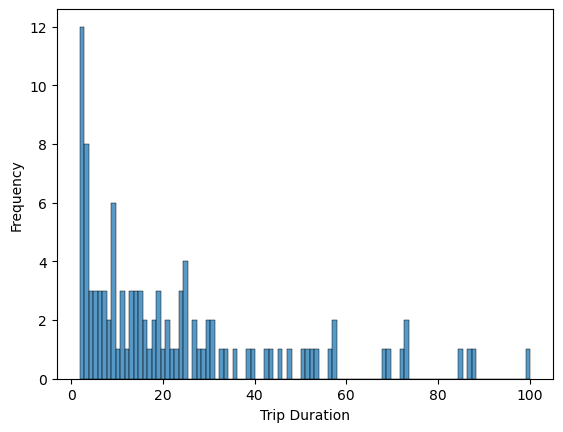

In [54]:
# histplot to see distribution of duration 
 
sns.histplot(df_filtered['trip_duration'], kde=False, bins=100)

plt.xlabel('Trip Duration')
plt.ylabel('Frequency')

plt.show()

In [55]:
df_filtered['trip_duration'].describe()

count    107.000000
mean      23.210125
std       22.746422
min        1.816667
25%        6.133333
50%       15.566667
75%       30.208333
max      100.166667
Name: trip_duration, dtype: float64

* most rides with the same start and end station names appear to be round trips with longer trip durations
* however, there are still short trips that were likely docked back to the same station shortly after starting, and they lasted longer than the minimum trip duration of 1.8 minutes.
* there are many popular round trips routes in Washington DC which may take from 10 minutes such as The White House to more than an hour such as The Mount Vernon Trail  
* using the 25% percentile value 6.1333 as it makes more sense as min value for a short trip to dock bike back to same station

In [56]:
# remove trips where start and end station names are the same and trip duration is less than 6.1333 minutes
df_classic = df_classic[~((df_classic['start_station_name'] == df_classic['end_station_name']) & 
                          (df_classic['trip_duration'] <  6.1333))].reset_index(drop=True)

df_classic


,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,25.333333
1,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,3.233333
2,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617,Good Hope Rd & MLK Ave SE,31802,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667
3,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131,14th & R St NW,31202,38.934405,-77.032687,38.913046,-77.032008,member,9.466667
4,2021-01-01 00:24:12,2021-01-01 00:47:47,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,38.890539,-77.049383,38.899632,-77.031686,casual,23.583333
...,...,...,...,...,...,...,...,...,...,...,...,...
7132871,2023-12-31 23:53:54,2023-12-31 23:58:07,Georgetown Harbor / 30th St NW,31215,Virginia Ave & 25th St NW,31297,38.902268,-77.059117,38.898460,-77.053052,casual,4.216667
7132872,2023-12-31 23:54:49,2024-01-01 01:15:59,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,Independence Ave & L'Enfant Plaza SW/DOE,31633,38.888774,-77.028694,38.887312,-77.025762,casual,81.166667
7132873,2023-12-31 23:57:53,2024-01-01 00:13:53,18th & New Hampshire Ave NW,31324,17th & K St NW,31213,38.911268,-77.041829,38.902760,-77.038630,member,16.000000
7132874,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884095,-76.995234,38.890461,-76.988355,casual,4.483333


In [57]:
df_filtered = df_classic[df_classic['start_station_name'] == df_classic['end_station_name']]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 118686 to 7085731
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   started_at          80 non-null     datetime64[ns]
 1   ended_at            80 non-null     datetime64[ns]
 2   start_station_name  80 non-null     object        
 3   start_station_id    80 non-null     Int64         
 4   end_station_name    80 non-null     object        
 5   end_station_id      80 non-null     Int64         
 6   start_lat           80 non-null     float64       
 7   start_lng           80 non-null     float64       
 8   end_lat             80 non-null     float64       
 9   end_lng             80 non-null     float64       
 10  member_casual       80 non-null     category      
 11  trip_duration       80 non-null     float64       
dtypes: Int64(2), category(1), datetime64[ns](2), float64(5), object(2)
memory usage: 7.9+ KB


In [58]:
df_filtered.head()

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
118686,2021-03-04 13:58:37,2021-03-04 14:17:03,Crystal Dr & 23rd St S,31011,Crystal Dr & 23rd St S,31011,38.853300,-77.049800,38.852929,-77.049723,casual,18.433333
119352,2021-03-04 17:32:07,2021-03-04 18:25:42,Crystal Dr & 23rd St S,31011,Crystal Dr & 23rd St S,31011,38.853300,-77.049800,38.852929,-77.049723,casual,53.583333
1929633,2022-01-29 16:03:26,2022-01-29 16:25:36,8th & O St NW,31281,8th & O St NW,31281,38.908544,-77.022702,38.908640,-77.022770,casual,22.166667
3136118,2022-07-21 17:47:44,2022-07-21 18:14:35,Crystal Dr & 23rd St S,31011,Crystal Dr & 23rd St S,31011,38.852910,-77.049751,38.852929,-77.049723,casual,26.850000
3279432,2022-08-06 18:54:04,2022-08-06 20:18:54,3rd & Elm St NW,31118,3rd & Elm St NW,31118,38.917613,-77.015953,38.917622,-77.015970,casual,84.833333


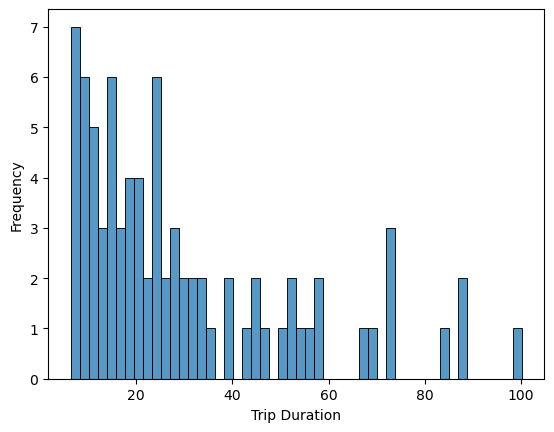

In [59]:
# histplot to see distribution of duration 
 
sns.histplot(df_filtered['trip_duration'], kde=False, bins=50)

plt.xlabel('Trip Duration')
plt.ylabel('Frequency')

plt.show()

In [60]:
df_classic.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
started_at,7132876,NaN,NaN,NaN,2022-08-29 12:55:00.149412352,2021-01-01 00:08:33,2021-12-11 11:31:20.500000,2022-09-07 17:13:38,2023-05-22 17:54:17,2023-12-31 23:58:06,NaN
ended_at,7132876,NaN,NaN,NaN,2022-08-29 13:09:55.856405248,2021-01-01 00:21:00,2021-12-11 11:49:48.249999872,2022-09-07 17:26:20,2023-05-22 18:10:24.750000128,2024-01-01 01:16:23,NaN
start_station_name,7132876,856,New Hampshire Ave & T St NW,85793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_station_id,7132876.0,<NA>,<NA>,<NA>,31364.604346,30200.0,31212.0,31277.0,31608.0,33200.0,253.065224
end_station_name,7132876,860,New Hampshire Ave & T St NW,85298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_station_id,7132876.0,<NA>,<NA>,<NA>,31366.500967,30200.0,31214.0,31275.0,31609.0,33200.0,253.569916
start_lat,7132876.0,NaN,NaN,NaN,38.902204,38.782633,38.890863,38.902674,38.912648,39.125828,0.024031
start_lng,7132876.0,NaN,NaN,NaN,-77.031179,-77.368416,-77.0444,-77.031737,-77.0135,-76.825535,0.03068
end_lat,7132876.0,NaN,NaN,NaN,38.900854,38.782633,38.890539,38.902061,38.910972,39.125828,0.023552
end_lng,7132876.0,NaN,NaN,NaN,-77.030802,-77.368416,-77.0444,-77.031617,-77.012443,-76.825535,0.030318


In [61]:
df_classic['start_station_name'].nunique()

856

In [62]:
df_classic['start_station_id'].nunique()

771

* there is also a difference between number of unique station names and station ids, which we need to resolve  
* the reason can be that a name has multiple id numbers or an ID has multiple names

In [63]:
# group by 'start_station_name' and get the unique 'start_station_id' for each station
start_station_ids = df_classic.groupby('start_station_name')['start_station_id'].unique().reset_index()

# add a new column to count the number of unique station IDs for each station name
start_station_ids['num_ids'] = start_station_ids['start_station_id'].apply(len)

# filter the rows where there is more than one unique station ID for the same name
stations_with_multiple_ids = start_station_ids[start_station_ids['num_ids'] > 1].reset_index(drop=True)

stations_with_multiple_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_station_name  3 non-null      object
 1   start_station_id    3 non-null      object
 2   num_ids             3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [64]:
stations_with_multiple_ids.head()

,start_station_name,start_station_id,num_ids
0,16th & Harvard St NW,"[31103, 31135]",2
1,Fairfax Dr & N Taylor St,"[31974, 31049]",2
2,Randle Circle & Minnesota Ave SE,"[31702, 31799]",2


In [65]:
df_classic[df_classic['start_station_name'] == '16th & Harvard St NW']

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
113,2021-01-01 06:52:40,2021-01-01 06:55:51,16th & Harvard St NW,31103,New Hampshire Ave & T St NW,31229,38.926088,-77.036536,38.915544,-77.038252,member,3.183333
188,2021-01-01 09:34:03,2021-01-01 09:36:27,16th & Harvard St NW,31103,14th & Irving St NW,31124,38.926088,-77.036536,38.928552,-77.032224,member,2.400000
286,2021-01-01 11:20:28,2021-01-01 11:35:13,16th & Harvard St NW,31103,18th & M St NW,31221,38.926088,-77.036536,38.905067,-77.041779,casual,14.750000
377,2021-01-01 13:41:45,2021-01-01 13:49:12,16th & Harvard St NW,31103,16th & R St NW,31282,38.926088,-77.036536,38.912652,-77.036278,member,7.450000
455,2021-01-01 15:04:08,2021-01-01 15:12:36,16th & Harvard St NW,31103,10th & U St NW,31111,38.926088,-77.036536,38.917200,-77.025900,member,8.466667
...,...,...,...,...,...,...,...,...,...,...,...,...
7132078,2023-12-31 17:06:44,2023-12-31 17:35:29,16th & Harvard St NW,31135,Lincoln Park / 13th & East Capitol St NE,31619,38.926102,-77.036650,38.890461,-76.988355,casual,28.750000
7132100,2023-12-31 17:11:04,2023-12-31 17:26:40,16th & Harvard St NW,31135,22nd & I St NW / Foggy Bottom,31257,38.926102,-77.036650,38.900880,-77.048911,casual,15.600000
7132213,2023-12-31 17:42:00,2023-12-31 17:44:52,16th & Harvard St NW,31135,Lamont & Mt Pleasant NW,31107,38.926102,-77.036650,38.931900,-77.038800,member,2.866667
7132379,2023-12-31 18:40:11,2023-12-31 18:45:17,16th & Harvard St NW,31135,11th & Park Rd NW,31651,38.926102,-77.036650,38.931322,-77.028247,member,5.100000


* station name: '16th & Harvard St NW' has 2 ids as follows: 31103 and 31135
* start_lat	and start_lng values are same till 4th decimal(around 10 meter detail) which assures that this name has duplicate ids

In [66]:
df_classic[df_classic['start_station_name'] == 'Fairfax Dr & N Taylor St']

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
3184081,2022-07-27 08:38:01,2022-07-27 08:52:07,Fairfax Dr & N Taylor St,31974,Arlington Blvd & S George Mason Dr,31078,38.882425,-77.112754,38.869442,-77.104503,casual,14.100000
3187555,2022-07-27 16:22:18,2022-07-27 16:27:03,Fairfax Dr & N Taylor St,31974,Glebe Rd & 11th St N,31038,38.882425,-77.112754,38.883921,-77.116817,member,4.750000
3195844,2022-07-28 13:29:24,2022-07-28 13:38:51,Fairfax Dr & N Taylor St,31974,N Pershing Dr & Quebec St,31973,38.882425,-77.112754,38.874248,-77.104784,member,9.450000
3198068,2022-07-28 17:37:12,2022-07-28 18:10:28,Fairfax Dr & N Taylor St,31974,23rd & M St NW,31128,38.882425,-77.112754,38.905303,-77.050264,member,33.266667
3198214,2022-07-28 17:45:33,2022-07-28 18:13:40,Fairfax Dr & N Taylor St,31974,20th St & Florida Ave NW,31110,38.882425,-77.112754,38.915400,-77.044600,member,28.116667
...,...,...,...,...,...,...,...,...,...,...,...,...
7117410,2023-12-26 20:45:40,2023-12-26 20:53:43,Fairfax Dr & N Taylor St,31049,Wilson Blvd & N Illinois St,31902,38.882425,-77.112754,38.876528,-77.127120,casual,8.050000
7121942,2023-12-28 19:31:18,2023-12-28 19:33:51,Fairfax Dr & N Taylor St,31049,Wilson Blvd & N Quincy St,31039,38.882425,-77.112754,38.880012,-77.107854,member,2.550000
7124801,2023-12-29 15:46:10,2023-12-29 15:58:11,Fairfax Dr & N Taylor St,31049,Arlington Blvd & Fairfax Dr,31940,38.882425,-77.112754,38.886256,-77.084262,casual,12.016667
7130277,2023-12-31 11:12:04,2023-12-31 11:19:48,Fairfax Dr & N Taylor St,31049,Washington-Liberty High School / N Stafford St...,31920,38.882425,-77.112754,38.888282,-77.111066,casual,7.733333


* same situation for this station as well
* I will choose the latest id number for each station name and update ids accordingly

In [67]:
# Update the 'start_station_id' for stations with multiple ids
df_classic.loc[df_classic['start_station_name'] == '16th & Harvard St NW', 'start_station_id'] = 31135
df_classic.loc[df_classic['start_station_name'] == 'Fairfax Dr & N Taylor St', 'start_station_id'] = 31049
df_classic.loc[df_classic['start_station_name'] == 'Randle Circle & Minnesota Ave SE', 'start_station_id'] = 31799

In [68]:
df_classic[df_classic['start_station_name'] == '16th & Harvard St NW']

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
113,2021-01-01 06:52:40,2021-01-01 06:55:51,16th & Harvard St NW,31135,New Hampshire Ave & T St NW,31229,38.926088,-77.036536,38.915544,-77.038252,member,3.183333
188,2021-01-01 09:34:03,2021-01-01 09:36:27,16th & Harvard St NW,31135,14th & Irving St NW,31124,38.926088,-77.036536,38.928552,-77.032224,member,2.400000
286,2021-01-01 11:20:28,2021-01-01 11:35:13,16th & Harvard St NW,31135,18th & M St NW,31221,38.926088,-77.036536,38.905067,-77.041779,casual,14.750000
377,2021-01-01 13:41:45,2021-01-01 13:49:12,16th & Harvard St NW,31135,16th & R St NW,31282,38.926088,-77.036536,38.912652,-77.036278,member,7.450000
455,2021-01-01 15:04:08,2021-01-01 15:12:36,16th & Harvard St NW,31135,10th & U St NW,31111,38.926088,-77.036536,38.917200,-77.025900,member,8.466667
...,...,...,...,...,...,...,...,...,...,...,...,...
7132078,2023-12-31 17:06:44,2023-12-31 17:35:29,16th & Harvard St NW,31135,Lincoln Park / 13th & East Capitol St NE,31619,38.926102,-77.036650,38.890461,-76.988355,casual,28.750000
7132100,2023-12-31 17:11:04,2023-12-31 17:26:40,16th & Harvard St NW,31135,22nd & I St NW / Foggy Bottom,31257,38.926102,-77.036650,38.900880,-77.048911,casual,15.600000
7132213,2023-12-31 17:42:00,2023-12-31 17:44:52,16th & Harvard St NW,31135,Lamont & Mt Pleasant NW,31107,38.926102,-77.036650,38.931900,-77.038800,member,2.866667
7132379,2023-12-31 18:40:11,2023-12-31 18:45:17,16th & Harvard St NW,31135,11th & Park Rd NW,31651,38.926102,-77.036650,38.931322,-77.028247,member,5.100000


* check the Start station IDs which have multiple names

In [69]:
# group by 'start_station_id' and get the unique 'start_station_name' for each ID
station_names = df_classic.groupby('start_station_id')['start_station_name'].unique().reset_index()

# ddd a new column to count the number of unique station names for each station ID
station_names['num_names'] = station_names['start_station_name'].apply(len)

# filter the rows where there is more than one unique station name for the same ID
ids_with_multiple_names = station_names[station_names['num_names'] > 1].reset_index(drop=True)

ids_with_multiple_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_station_id    81 non-null     Int64 
 1   start_station_name  81 non-null     object
 2   num_names           81 non-null     int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 2.1+ KB


* 81 ID number has more than 1 name for start stations

In [70]:
ids_with_multiple_names.head(10)

,start_station_id,start_station_name,num_names
0,31006,"[Army Navy Dr & S Joyce St, Pentagon Row Plaza...",2
1,31014,"[Lynn St & 19th St North, 19th St N & Ft Myer Dr]",2
2,31015,"[Rosslyn Metro / Wilson Blvd & Ft Myer Dr, Wil...",2
3,31027,"[Key Blvd & N Quinn St, Wilson Blvd & N Quinn St]",2
4,31030,"[Lee Hwy & N Adams St, Langston Blvd & N Adams...",2
5,31040,"[GMU / Fairfax Dr & Kenmore St, GMU/Fairfax Dr...",2
6,31047,"[Braddock Rd Metro, Braddock Rd Metro North]",2
7,31049,"[Utah St & 11th St N, Fairfax Dr & N Taylor St]",2
8,31051,"[Arlington Blvd & N Queen St, 12th St N & N Pi...",2
9,31056,"[Troy St & 26th St S, S Troy St & 26th St S]",2


In [71]:
df_classic[df_classic['start_station_id'] == 31030]

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
781,2021-01-02 09:47:15,2021-01-02 09:52:16,Lee Hwy & N Adams St,31030,Wilson Blvd & N Uhle St,31017,38.89593,-77.089006,38.891696,-77.084600,member,5.016667
2564,2021-01-02 15:00:33,2021-01-02 15:15:06,Lee Hwy & N Adams St,31030,Roosevelt Island,31062,38.89593,-77.089006,38.896553,-77.067140,member,14.550000
5160,2021-01-04 08:11:36,2021-01-04 08:18:25,Lee Hwy & N Adams St,31030,Lynn St & 19th St North,31014,38.89593,-77.089006,38.897315,-77.070993,member,6.816667
6702,2021-01-04 20:42:14,2021-01-04 20:45:43,Lee Hwy & N Adams St,31030,Lee Hwy & N Kirkwood Rd,31094,38.89593,-77.089006,38.895377,-77.097130,member,3.483333
7793,2021-01-05 14:59:26,2021-01-05 15:07:13,Lee Hwy & N Adams St,31030,Fairfax Dr & Wilson Blvd,31023,38.89593,-77.089006,38.885801,-77.097745,member,7.783333
...,...,...,...,...,...,...,...,...,...,...,...,...
7124825,2023-12-29 15:50:03,2023-12-29 15:54:14,Langston Blvd & N Adams St,31030,Wilson Blvd & N Edgewood St,31019,38.89593,-77.089006,38.889396,-77.091862,member,4.183333
7125590,2023-12-29 17:54:43,2023-12-29 17:57:01,Langston Blvd & N Adams St,31030,N Veitch St & 20th St N,31029,38.89593,-77.089006,38.896923,-77.086502,member,2.300000
7126490,2023-12-30 08:44:04,2023-12-30 08:47:03,Langston Blvd & N Adams St,31030,Wilson Blvd & N Franklin Rd,31020,38.89593,-77.089006,38.890400,-77.088900,member,2.983333
7127140,2023-12-30 11:58:04,2023-12-30 12:05:52,Langston Blvd & N Adams St,31030,Washington Blvd & 10th St N,31026,38.89593,-77.089006,38.884734,-77.093485,member,7.800000


* on this station id, it is only a name change since all other features show that this is the exact same station 

In [72]:
df_classic[df_classic['start_station_id'] == 31027]

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
749,2021-01-02 09:28:00,2021-01-02 09:35:01,Key Blvd & N Quinn St,31027,Roosevelt Island,31062,38.896355,-77.078408,38.896553,-77.067140,member,7.016667
3228,2021-01-02 16:30:02,2021-01-02 16:51:05,Key Blvd & N Quinn St,31027,Lynn St & 19th St North,31014,38.896355,-77.078408,38.897315,-77.070993,member,21.050000
4442,2021-01-03 12:45:51,2021-01-03 13:55:18,Key Blvd & N Quinn St,31027,Lee Hwy & N Scott St,31080,38.896355,-77.078408,38.897612,-77.080851,casual,69.450000
9068,2021-01-06 10:26:00,2021-01-06 10:53:47,Key Blvd & N Quinn St,31027,18th & C St NW,31284,38.896355,-77.078408,38.893511,-77.041544,member,27.783333
12925,2021-01-08 12:01:39,2021-01-08 12:09:46,Key Blvd & N Quinn St,31027,Potomac & M St NW,31295,38.896355,-77.078408,38.905368,-77.065149,member,8.116667
...,...,...,...,...,...,...,...,...,...,...,...,...
7131091,2023-12-31 13:50:23,2023-12-31 14:13:18,Wilson Blvd & N Quinn St,31027,N Pershing Dr & N Wayne St,31065,38.893993,-77.078570,38.880705,-77.085960,casual,22.916667
7131121,2023-12-31 13:56:31,2023-12-31 14:13:26,Wilson Blvd & N Quinn St,31027,N Pershing Dr & N Wayne St,31065,38.893993,-77.078570,38.880705,-77.085960,casual,16.916667
7131123,2023-12-31 13:56:47,2023-12-31 14:13:16,Wilson Blvd & N Quinn St,31027,N Pershing Dr & N Wayne St,31065,38.893993,-77.078570,38.880705,-77.085960,casual,16.483333
7131475,2023-12-31 15:05:23,2023-12-31 15:18:09,Wilson Blvd & N Quinn St,31027,Virginia Ave & 25th St NW,31297,38.893993,-77.078570,38.898460,-77.053052,member,12.766667


* here we have a name change + a location change
* geo coordinates are approximately has 300 meters of distance. 

In [73]:
ids_with_multiple_names.tail()

,start_station_id,start_station_name,num_names
76,32250,"[South Gate Community Center, Glade Dr & Pinec...",2
77,32261,[Vaden Dr & Royal Victoria Dr/Providence Commu...,2
78,32270,"[Westbranch Dr & Jones Branch Dr, Westbranch &...",2
79,32600,[George Mason High School / Haycock Rd & Leesb...,3
80,32601,"[State Theatre / Park Pl & N Washington St, Ed...",2


In [74]:
df_classic[df_classic['start_station_id'] == 32600]

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
2521,2021-01-02 14:55:01,2021-01-02 15:39:01,George Mason High School / Haycock Rd & Leesbu...,32600,S Arlington Mill Dr & Campbell Ave,31060,38.895172,-77.190275,38.842320,-77.089555,member,44.000000
18006,2021-01-10 13:51:25,2021-01-10 14:23:51,George Mason High School / Haycock Rd & Leesbu...,32600,Towers Crescent Dr & Tysons One Pl,32222,38.895172,-77.190275,38.915246,-77.220157,casual,32.433333
22458,2021-01-12 15:07:36,2021-01-12 15:16:42,George Mason High School / Haycock Rd & Leesbu...,32600,N Oak St & W Broad St,32602,38.895172,-77.190275,38.888370,-77.179832,member,9.100000
30659,2021-01-16 08:41:17,2021-01-16 09:04:12,George Mason High School / Haycock Rd & Leesbu...,32600,W Columbia St & N Washington St,32609,38.895172,-77.190275,38.885621,-77.166917,casual,22.916667
30666,2021-01-16 08:45:06,2021-01-16 09:04:44,George Mason High School / Haycock Rd & Leesbu...,32600,W Columbia St & N Washington St,32609,38.895172,-77.190275,38.885621,-77.166917,casual,19.633333
...,...,...,...,...,...,...,...,...,...,...,...,...
7102026,2023-12-20 16:48:05,2023-12-20 17:06:35,Founders Row/W Broad St & West St,32600,East Falls Church Metro / Sycamore St & 19th St N,31904,38.890155,-77.183178,38.885321,-77.156427,member,18.500000
7114872,2023-12-25 13:17:15,2023-12-25 13:39:00,Founders Row/W Broad St & West St,32600,East Falls Church Metro / Sycamore St & 19th St N,31904,38.890155,-77.183178,38.885321,-77.156427,member,21.750000
7114900,2023-12-25 13:26:16,2023-12-25 13:57:39,Founders Row/W Broad St & West St,32600,E Fairfax St & S Washington St,32604,38.890155,-77.183178,38.880612,-77.171891,casual,31.383333
7115114,2023-12-25 14:23:24,2023-12-25 14:35:27,Founders Row/W Broad St & West St,32600,W&OD Trail & Langston Blvd,31948,38.890155,-77.183178,38.887150,-77.162120,casual,12.050000


* The common thing with these stations is name change while some records also have a location change. 
* I will standardize the dataset by using the most up-to-date name and updating old names accordingly to make the station names consistent

In [75]:
# group by 'start_station_id', get the most recent 'start_station_name' 

df_classic['start_station_name'] = df_classic.groupby('start_station_id')['start_station_name'].transform('last')

In [76]:
df_classic[df_classic['start_station_id'] == 32600]

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
2521,2021-01-02 14:55:01,2021-01-02 15:39:01,Founders Row/W Broad St & West St,32600,S Arlington Mill Dr & Campbell Ave,31060,38.895172,-77.190275,38.842320,-77.089555,member,44.000000
18006,2021-01-10 13:51:25,2021-01-10 14:23:51,Founders Row/W Broad St & West St,32600,Towers Crescent Dr & Tysons One Pl,32222,38.895172,-77.190275,38.915246,-77.220157,casual,32.433333
22458,2021-01-12 15:07:36,2021-01-12 15:16:42,Founders Row/W Broad St & West St,32600,N Oak St & W Broad St,32602,38.895172,-77.190275,38.888370,-77.179832,member,9.100000
30659,2021-01-16 08:41:17,2021-01-16 09:04:12,Founders Row/W Broad St & West St,32600,W Columbia St & N Washington St,32609,38.895172,-77.190275,38.885621,-77.166917,casual,22.916667
30666,2021-01-16 08:45:06,2021-01-16 09:04:44,Founders Row/W Broad St & West St,32600,W Columbia St & N Washington St,32609,38.895172,-77.190275,38.885621,-77.166917,casual,19.633333
...,...,...,...,...,...,...,...,...,...,...,...,...
7102026,2023-12-20 16:48:05,2023-12-20 17:06:35,Founders Row/W Broad St & West St,32600,East Falls Church Metro / Sycamore St & 19th St N,31904,38.890155,-77.183178,38.885321,-77.156427,member,18.500000
7114872,2023-12-25 13:17:15,2023-12-25 13:39:00,Founders Row/W Broad St & West St,32600,East Falls Church Metro / Sycamore St & 19th St N,31904,38.890155,-77.183178,38.885321,-77.156427,member,21.750000
7114900,2023-12-25 13:26:16,2023-12-25 13:57:39,Founders Row/W Broad St & West St,32600,E Fairfax St & S Washington St,32604,38.890155,-77.183178,38.880612,-77.171891,casual,31.383333
7115114,2023-12-25 14:23:24,2023-12-25 14:35:27,Founders Row/W Broad St & West St,32600,W&OD Trail & Langston Blvd,31948,38.890155,-77.183178,38.887150,-77.162120,casual,12.050000


In [77]:
df_classic['start_station_name'].nunique()

770

In [78]:
df_classic['start_station_id'].nunique()

770

* The start_station_name and start_station_id features are now consistent.
* I will follow same steps for end station names and ids

In [79]:
df_classic['end_station_id'].nunique()

773

In [80]:
df_classic['end_station_name'].nunique()

860

In [81]:
# group by 'start_station_name' and get the unique 'start_station_id' for each station
start_station_ids = df_classic.groupby('end_station_name')['end_station_id'].unique().reset_index()

# add a new column to count the number of unique station IDs for each station name
start_station_ids['num_names'] = start_station_ids['end_station_id'].apply(len)

# filter the rows where there is more than one unique station ID for the same name
stations_with_multiple_ids = start_station_ids[start_station_ids['num_names'] > 1].reset_index(drop=True)

stations_with_multiple_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   end_station_name  4 non-null      object
 1   end_station_id    4 non-null      object
 2   num_names         4 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [82]:
stations_with_multiple_ids

,end_station_name,end_station_id,num_names
0,16th & Harvard St NW,"[31103, 31135]",2
1,Fairfax Dr & N Taylor St,"[31974, 31049]",2
2,Randle Circle & Minnesota Ave SE,"[31702, 31799]",2
3,S Wayne and 9th St,"[31980, 31971]",2


* first 3 are the same stations I just corrected for the start station names and ids

In [83]:
# Update the 'start_station_id' for stations with multiple ids
df_classic.loc[df_classic['end_station_name'] == '16th & Harvard St NW', 'end_station_id'] = 31135
df_classic.loc[df_classic['end_station_name'] == 'Fairfax Dr & N Taylor St', 'end_station_id'] = 31049
df_classic.loc[df_classic['end_station_name'] == 'Randle Circle & Minnesota Ave SE', 'end_station_id'] = 31799
df_classic.loc[df_classic['end_station_name'] == 'S Wayne and 9th St', 'end_station_id'] = 31971

In [84]:
station_names = df_classic.groupby('end_station_id')['end_station_name'].unique().reset_index()

station_names['num_names'] = station_names['end_station_name'].apply(len)

ids_with_multiple_names = station_names[station_names['num_names'] > 1].reset_index(drop=True)

ids_with_multiple_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   end_station_id    83 non-null     Int64 
 1   end_station_name  83 non-null     object
 2   num_names         83 non-null     int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 2.2+ KB


In [85]:
ids_with_multiple_names.head(10)

,end_station_id,end_station_name,num_names
0,31006,"[Army Navy Dr & S Joyce St, Pentagon Row Plaza...",2
1,31014,"[Lynn St & 19th St North, 19th St N & Ft Myer Dr]",2
2,31015,"[Rosslyn Metro / Wilson Blvd & Ft Myer Dr, Wil...",2
3,31027,"[Key Blvd & N Quinn St, Wilson Blvd & N Quinn St]",2
4,31030,"[Lee Hwy & N Adams St, Langston Blvd & N Adams...",2
5,31040,"[GMU / Fairfax Dr & Kenmore St, GMU/Fairfax Dr...",2
6,31047,"[Braddock Rd Metro, Braddock Rd Metro North]",2
7,31049,"[Utah St & 11th St N, Fairfax Dr & N Taylor St]",2
8,31051,"[Arlington Blvd & N Queen St, 12th St N & N Pi...",2
9,31056,"[Troy St & 26th St S, S Troy St & 26th St S]",2


In [86]:
df_classic[df_classic['end_station_id'] == 31006]

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
1219,2021-01-02 11:53:20,2021-01-02 11:58:35,Pentagon City Metro / 12th St & S Hayes St,31005,Army Navy Dr & S Joyce St,31006,38.862303,-77.059936,38.863700,-77.063300,member,5.250000
1769,2021-01-02 13:16:25,2021-01-02 13:36:33,Crystal Dr & 23rd St S,31011,Army Navy Dr & S Joyce St,31006,38.853300,-77.049800,38.863700,-77.063300,member,20.133333
2617,2021-01-02 15:06:48,2021-01-02 15:27:16,Jefferson Memorial,31249,Army Navy Dr & S Joyce St,31006,38.879819,-77.037413,38.863700,-77.063300,member,20.466667
2873,2021-01-02 15:40:32,2021-01-02 16:06:06,Gravelly Point,31064,Army Navy Dr & S Joyce St,31006,38.865029,-77.039511,38.863700,-77.063300,member,25.566667
3144,2021-01-02 16:17:52,2021-01-02 16:44:17,25th St & Pennsylvania Ave NW,31237,Army Navy Dr & S Joyce St,31006,38.903827,-77.053485,38.863700,-77.063300,member,26.416667
...,...,...,...,...,...,...,...,...,...,...,...,...
7129205,2023-12-30 18:40:30,2023-12-30 19:02:43,S Glebe Rd & Potomac Ave,31010,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.842600,-77.050200,38.863314,-77.063416,member,22.216667
7129247,2023-12-30 18:58:38,2023-12-30 19:04:01,Eads St & 15th St S,31000,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.859751,-77.053235,38.863314,-77.063416,member,5.383333
7129939,2023-12-31 09:15:24,2023-12-31 09:17:27,Joyce St & 16th St S,31091,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.859254,-77.063275,38.863314,-77.063416,casual,2.050000
7132143,2023-12-31 17:23:01,2023-12-31 17:27:10,Eads St & 12th St S,31071,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.863073,-77.054541,38.863314,-77.063416,member,4.150000


In [87]:
df_classic['end_station_name'] = df_classic.groupby('end_station_id')['end_station_name'].transform('last')

In [88]:
df_classic[df_classic['end_station_id'] == 31006]

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
1219,2021-01-02 11:53:20,2021-01-02 11:58:35,Pentagon City Metro / 12th St & S Hayes St,31005,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.862303,-77.059936,38.863700,-77.063300,member,5.250000
1769,2021-01-02 13:16:25,2021-01-02 13:36:33,Crystal Dr & 23rd St S,31011,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.853300,-77.049800,38.863700,-77.063300,member,20.133333
2617,2021-01-02 15:06:48,2021-01-02 15:27:16,Jefferson Memorial,31249,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.879819,-77.037413,38.863700,-77.063300,member,20.466667
2873,2021-01-02 15:40:32,2021-01-02 16:06:06,Gravelly Point,31064,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.865029,-77.039511,38.863700,-77.063300,member,25.566667
3144,2021-01-02 16:17:52,2021-01-02 16:44:17,25th St & Pennsylvania Ave NW,31237,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.903827,-77.053485,38.863700,-77.063300,member,26.416667
...,...,...,...,...,...,...,...,...,...,...,...,...
7129205,2023-12-30 18:40:30,2023-12-30 19:02:43,S Glebe Rd & Potomac Ave,31010,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.842600,-77.050200,38.863314,-77.063416,member,22.216667
7129247,2023-12-30 18:58:38,2023-12-30 19:04:01,Eads St & 15th St S,31000,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.859751,-77.053235,38.863314,-77.063416,member,5.383333
7129939,2023-12-31 09:15:24,2023-12-31 09:17:27,Joyce St & 16th St S,31091,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.859254,-77.063275,38.863314,-77.063416,casual,2.050000
7132143,2023-12-31 17:23:01,2023-12-31 17:27:10,Eads St & 12th St S,31071,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.863073,-77.054541,38.863314,-77.063416,member,4.150000


In [89]:
df_classic['end_station_id'].nunique()

771

In [90]:
df_classic['end_station_name'].nunique()

771

In [91]:
df_classic['start_station_id'].nunique()

770

In [92]:
# find the station which is missing in start station 
set(df_classic['end_station_name'].unique()) - set(df_classic['start_station_name'].unique())

{'Kingsbridge Dr & Draper Dr'}

In [93]:
df_classic[df_classic['start_station_name'] == 'Kingsbridge Dr & Draper Dr']

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration


In [94]:
df_classic[df_classic['end_station_name'] == 'Kingsbridge Dr & Draper Dr']

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
7128208,2023-12-30 15:15:07,2023-12-30 15:19:16,Mission Square Dr & Miranda Ct,31397,Kingsbridge Dr & Draper Dr,31387,38.868979,-77.275484,38.868545,-77.282083,member,4.15


In [95]:
df_rides[df_rides['end_station_name'] == 'Kingsbridge Dr & Draper Dr']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
10612629,FBFB19395575E63D,classic_bike,2023-12-21 15:03:52,2023-12-21 15:03:56,Kingsbridge Dr & Draper Dr,31387.0,Kingsbridge Dr & Draper Dr,31387.0,38.868545,-77.282083,38.868545,-77.282083,member,0.066667
10666465,F9DAFBB66033520D,classic_bike,2023-12-30 15:15:07,2023-12-30 15:19:16,Mission Square Dr & Miranda Ct,31397.0,Kingsbridge Dr & Draper Dr,31387.0,38.868979,-77.275484,38.868545,-77.282083,member,4.150000
10670429,4B3E5B94FFAFEB41,classic_bike,2023-12-31 08:17:20,2023-12-31 08:17:23,Kingsbridge Dr & Draper Dr,31387.0,Kingsbridge Dr & Draper Dr,31387.0,38.868545,-77.282083,38.868545,-77.282083,member,0.050000


In [96]:
df_rides[df_rides['start_station_name'] == 'Kingsbridge Dr & Draper Dr']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
10612629,FBFB19395575E63D,classic_bike,2023-12-21 15:03:52,2023-12-21 15:03:56,Kingsbridge Dr & Draper Dr,31387.0,Kingsbridge Dr & Draper Dr,31387.0,38.868545,-77.282083,38.868545,-77.282083,member,0.066667
10670429,4B3E5B94FFAFEB41,classic_bike,2023-12-31 08:17:20,2023-12-31 08:17:23,Kingsbridge Dr & Draper Dr,31387.0,Kingsbridge Dr & Draper Dr,31387.0,38.868545,-77.282083,38.868545,-77.282083,member,0.050000


* start and end stations don’t have to match perfectly, but the results above explain why there is 1 more station in the end_station_name column
* this is due to just three rides, each lasting a maximum of 4 minutes, that started and ended at the same point. I am removing these rides from the records.

In [97]:
# remove rows with the 'Kingsbridge Dr & Draper Dr' end station name
df_classic = df_classic[df_classic['end_station_name'] != 'Kingsbridge Dr & Draper Dr'].reset_index(drop=True)
df_classic


,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,25.333333
1,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,3.233333
2,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617,MLK & Marion Barry Ave SE,31802,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667
3,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131,14th & R St NW,31202,38.934405,-77.032687,38.913046,-77.032008,member,9.466667
4,2021-01-01 00:24:12,2021-01-01 00:47:47,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,38.890539,-77.049383,38.899632,-77.031686,casual,23.583333
...,...,...,...,...,...,...,...,...,...,...,...,...
7132870,2023-12-31 23:53:54,2023-12-31 23:58:07,Georgetown Harbor / 30th St NW,31215,Virginia Ave & 25th St NW,31297,38.902268,-77.059117,38.898460,-77.053052,casual,4.216667
7132871,2023-12-31 23:54:49,2024-01-01 01:15:59,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,Independence Ave & L'Enfant Plaza SW/DOE,31633,38.888774,-77.028694,38.887312,-77.025762,casual,81.166667
7132872,2023-12-31 23:57:53,2024-01-01 00:13:53,18th & New Hampshire Ave NW,31324,17th & K St NW,31213,38.911268,-77.041829,38.902760,-77.038630,member,16.000000
7132873,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884095,-76.995234,38.890461,-76.988355,casual,4.483333


In [98]:
df_classic['end_station_id'].nunique()

770

In [99]:
df_classic['end_station_name'].nunique()

770

In [100]:
df_classic['start_station_id'].nunique()

770

In [101]:
df_classic['start_station_name'].nunique()

770

In [102]:
set(df_classic['end_station_name'].unique()) - set(df_classic['start_station_name'].unique())

set()

In [103]:
df_classic.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
started_at,7132875,NaN,NaN,NaN,2022-08-29 12:54:54.237125120,2021-01-01 00:08:33,2021-12-11 11:31:19,2022-09-07 17:13:37,2023-05-22 17:54:15,2023-12-31 23:58:06,NaN
ended_at,7132875,NaN,NaN,NaN,2022-08-29 13:09:49.944208640,2021-01-01 00:21:00,2021-12-11 11:49:45.500000,2022-09-07 17:26:19,2023-05-22 18:10:23,2024-01-01 01:16:23,NaN
start_station_name,7132875,770,New Hampshire Ave & T St NW,85793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_station_id,7132875.0,<NA>,<NA>,<NA>,31364.611627,30200.0,31212.0,31277.0,31608.0,33200.0,253.065908
end_station_name,7132875,770,New Hampshire Ave & T St NW,85298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_station_id,7132875.0,<NA>,<NA>,<NA>,31366.505352,30200.0,31214.0,31275.0,31609.0,33200.0,253.573113
start_lat,7132875.0,NaN,NaN,NaN,38.902204,38.782633,38.890863,38.902674,38.912648,39.125828,0.024031
start_lng,7132875.0,NaN,NaN,NaN,-77.031179,-77.368416,-77.0444,-77.031737,-77.0135,-76.825535,0.03068
end_lat,7132875.0,NaN,NaN,NaN,38.900854,38.782633,38.890539,38.902061,38.910972,39.125828,0.023552
end_lng,7132875.0,NaN,NaN,NaN,-77.030802,-77.368416,-77.0444,-77.031617,-77.012443,-76.825535,0.030318


In [104]:
df_classic.isna().sum()

started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
trip_duration         0
dtype: int64

In [105]:
df_classic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7132875 entries, 0 to 7132874
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   started_at          datetime64[ns]
 1   ended_at            datetime64[ns]
 2   start_station_name  object        
 3   start_station_id    Int64         
 4   end_station_name    object        
 5   end_station_id      Int64         
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       category      
 11  trip_duration       float64       
dtypes: Int64(2), category(1), datetime64[ns](2), float64(5), object(2)
memory usage: 619.0+ MB


* After cleaning the dataset, the total number of classic bike rides decreased from 7,710,372 to 7,132,875, which is a reduction of approximately 7.5%

In [106]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         26280 non-null  datetime64[ns]
 1   hour         26280 non-null  int64         
 2   humidity     26280 non-null  int64         
 3   temperature  26280 non-null  float64       
 4   wmo_code     26280 non-null  int64         
 5   windspeed    26280 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 1.2 MB


# Feature Engineering

In [107]:
# create date and hour columns for rides dataset

df_classic['date'] = pd.to_datetime(df_classic['started_at']).dt.date  
df_classic['date'] = pd.to_datetime(df_classic['date'])
df_classic['hour'] = pd.to_datetime(df_classic['started_at']).dt.hour  

In [108]:
# create day year month columns for rides
df_classic['day'] = df_classic['date'].dt.day_name()
df_classic['year'] = df_classic['date'].dt.year
df_classic['month'] = df_classic['date'].dt.month
df_classic.head()

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,date,hour,day,year,month
0,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,25.333333,2021-01-01,0,Friday,2021,1
1,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,3.233333,2021-01-01,0,Friday,2021,1
2,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617,MLK & Marion Barry Ave SE,31802,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667,2021-01-01,0,Friday,2021,1
3,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131,14th & R St NW,31202,38.934405,-77.032687,38.913046,-77.032008,member,9.466667,2021-01-01,0,Friday,2021,1
4,2021-01-01 00:24:12,2021-01-01 00:47:47,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,38.890539,-77.049383,38.899632,-77.031686,casual,23.583333,2021-01-01,0,Friday,2021,1


In [109]:
# add seasons to rides dataset
df_classic['season'] = df_classic['month'].apply(lambda x: 
    'Winter' if x in [12, 1, 2] else 
    'Spring' if x in [3, 4, 5] else 
    'Summer' if x in [6, 7, 8] else 
    'Fall'
)

In [110]:
df_classic['season'] = df_classic['season'].astype('category')

In [111]:
# create holiday column 
# define the holiday dates for Washington DC

holiday_dates = pd.to_datetime([
    # 2021
    '2021-01-01', '2021-01-18', '2021-02-15', '2021-05-31', '2021-06-19', '2021-07-04',
    '2021-09-06', '2021-10-11', '2021-11-11', '2021-11-25', '2021-12-25',
    # 2022
    '2022-01-01', '2022-01-17', '2022-02-21', '2022-05-30', '2022-06-19', '2022-07-04',
    '2022-09-05', '2022-10-10', '2022-11-11', '2022-11-24', '2022-12-25',
    # 2023
    '2023-01-01', '2023-01-16', '2023-02-20', '2023-05-29', '2023-06-19', '2023-07-04',
    '2023-09-04', '2023-10-09', '2023-11-11', '2023-11-23', '2023-12-25',
])


# mark weekends as holidays and turn this boolean value to int
df_classic['holiday'] = df_classic['day'].isin(['Saturday', 'Sunday']).astype(int)

# add official holidays with same logic
df_classic['holiday'] = df_classic['holiday'] | df_classic['date'].isin(holiday_dates).astype(int)

df_classic.head().T

,0,1,2,3,4
started_at,2021-01-01 00:08:33,2021-01-01 00:17:46,2021-01-01 00:19:06,2021-01-01 00:21:39,2021-01-01 00:24:12
ended_at,2021-01-01 00:33:53,2021-01-01 00:21:00,2021-01-01 00:36:28,2021-01-01 00:31:07,2021-01-01 00:47:47
start_station_name,Maine Ave & 9th St SW,11th & Park Rd NW,Bladensburg Rd & Benning Rd NE,14th & Otis Pl NW,Henry Bacon Dr & Lincoln Memorial Circle NW
start_station_id,31646,31651,31617,31131,31289
end_station_name,Wilson Blvd & Ft Myer Dr,14th & Newton St NW,MLK & Marion Barry Ave SE,14th & R St NW,14th St & New York Ave NW
end_station_id,31015,31649,31802,31202,31216
start_lat,38.88044,38.931322,38.900413,38.934405,38.890539
start_lng,-77.025236,-77.028247,-76.982872,-77.032687,-77.049383
end_lat,38.8946,38.931991,38.867373,38.913046,38.899632
end_lng,-77.072305,-77.032956,-76.988039,-77.032008,-77.031686


In [112]:
df_classic['holiday'].value_counts()

holiday
0    4913039
1    2219836
Name: count, dtype: int64

In [113]:
# I also want to add a time_of _day feature 

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_classic['time_of_day'] = df_classic['hour'].apply(time_of_day)

df_classic.tail()

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,date,hour,day,year,month,season,holiday,time_of_day
7132870,2023-12-31 23:53:54,2023-12-31 23:58:07,Georgetown Harbor / 30th St NW,31215,Virginia Ave & 25th St NW,31297,38.902268,-77.059117,38.898460,-77.053052,casual,4.216667,2023-12-31,23,Sunday,2023,12,Winter,1,Night
7132871,2023-12-31 23:54:49,2024-01-01 01:15:59,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,Independence Ave & L'Enfant Plaza SW/DOE,31633,38.888774,-77.028694,38.887312,-77.025762,casual,81.166667,2023-12-31,23,Sunday,2023,12,Winter,1,Night
7132872,2023-12-31 23:57:53,2024-01-01 00:13:53,18th & New Hampshire Ave NW,31324,17th & K St NW,31213,38.911268,-77.041829,38.902760,-77.038630,member,16.000000,2023-12-31,23,Sunday,2023,12,Winter,1,Night
7132873,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884095,-76.995234,38.890461,-76.988355,casual,4.483333,2023-12-31,23,Sunday,2023,12,Winter,1,Night
7132874,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955,Market Square / King St & Royal St,31042,38.806002,-77.055911,38.804718,-77.043363,member,14.383333,2023-12-31,23,Sunday,2023,12,Winter,1,Night


In [114]:
df_classic['time_of_day'] = df_classic['time_of_day'].astype('category')

In [115]:
df_classic.columns

Index(['started_at', 'ended_at', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'trip_duration', 'date', 'hour',
       'day', 'year', 'month', 'season', 'holiday', 'time_of_day'],
      dtype='object')

In [116]:
df_classic = df_classic[['started_at', 'ended_at', 'trip_duration', 
        'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 
       'start_lat', 'start_lng',
       'end_lat', 'end_lng', 
       'member_casual',  'date', 'hour',
       'day', 'year', 'month', 'season', 'holiday', 'time_of_day'
       ]].copy()

df_classic.head()

,started_at,ended_at,trip_duration,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,hour,day,year,month,season,holiday,time_of_day
0,2021-01-01 00:08:33,2021-01-01 00:33:53,25.333333,Maine Ave & 9th St SW,31646,Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,2021-01-01,0,Friday,2021,1,Winter,1,Night
1,2021-01-01 00:17:46,2021-01-01 00:21:00,3.233333,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,2021-01-01,0,Friday,2021,1,Winter,1,Night
2,2021-01-01 00:19:06,2021-01-01 00:36:28,17.366667,Bladensburg Rd & Benning Rd NE,31617,MLK & Marion Barry Ave SE,31802,38.900413,-76.982872,38.867373,-76.988039,casual,2021-01-01,0,Friday,2021,1,Winter,1,Night
3,2021-01-01 00:21:39,2021-01-01 00:31:07,9.466667,14th & Otis Pl NW,31131,14th & R St NW,31202,38.934405,-77.032687,38.913046,-77.032008,member,2021-01-01,0,Friday,2021,1,Winter,1,Night
4,2021-01-01 00:24:12,2021-01-01 00:47:47,23.583333,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,38.890539,-77.049383,38.899632,-77.031686,casual,2021-01-01,0,Friday,2021,1,Winter,1,Night


In [117]:
df_weather

,date,hour,humidity,temperature,wmo_code,windspeed
0,2021-01-01,0,90,2.4,1,10.2
1,2021-01-01,1,88,1.8,1,10.0
2,2021-01-01,2,87,1.1,2,10.1
3,2021-01-01,3,81,1.6,2,10.6
4,2021-01-01,4,77,1.6,2,9.9
...,...,...,...,...,...,...
26275,2023-12-31,19,71,-7.7,0,3.3
26276,2023-12-31,20,79,-10.2,0,6.7
26277,2023-12-31,21,80,-11.0,0,10.0
26278,2023-12-31,22,80,-10.4,0,8.7


*  we have only the codes below in our dataset:
* I will group these codes in 4 categories based on the distribution of values and their explanations as follows:
    1. clear: clear skies or minimal cloud with no precipitation, codes:0,1,2,3
    2. drizzle: codes: 51,53,55
    3. rain: codes: 61,63,65
    4. snow: codes: 71,73,75

In [118]:
# function to categorize wmo_code into groups

def categorize_wmo_code(wmo_code):
    if wmo_code in [0, 1, 2, 3]:
        return 'clear'
    elif wmo_code in [51, 53, 55]:
        return 'drizzle'
    elif wmo_code in [61, 63, 65]:
        return 'rain'
    elif wmo_code in [71, 73, 75]:
        return 'snow'

df_weather['wmo_category'] = df_weather['wmo_code'].apply(categorize_wmo_code)

df_weather.head()

,date,hour,humidity,temperature,wmo_code,windspeed,wmo_category
0,2021-01-01,0,90,2.4,1,10.2,clear
1,2021-01-01,1,88,1.8,1,10.0,clear
2,2021-01-01,2,87,1.1,2,10.1,clear
3,2021-01-01,3,81,1.6,2,10.6,clear
4,2021-01-01,4,77,1.6,2,9.9,clear


In [119]:
df_weather['wmo_category'] = df_weather['wmo_category'].astype('category')

# Exploratory Data Analysis